In [14]:
# Cette cellule Notebook doit être activée seulement dans Google Colab
# Elle permet de monter l'environnement dans ce contexte
# import os
# if not os.path.exists('minamp.py'):
#    !wget https://raw.githubusercontent.com/caush/MinAmp/master/minamp.py
# if not os.path.exists('CadreExperimental.csv'):
#    !wget https://raw.githubusercontent.com/caush/MinAmp/master/CadreExperimental.csv

In [3]:
import minamp as mn
import pandas as pd # faire "!pip install pandas" dans une cellule si le package n'est pas présent

In [4]:
import importlib
importlib.reload(mn)

<module 'minamp' from 'c:\\Users\\herve\\OneDrive\\Projet\\MinAmp\\minamp.py'>

## Récupération des métaparamètres
Directement du fichier csv dans un Dataframe Pandas

In [8]:
mp=pd.read_csv("CadreExperimental.csv", delimiter=";")

In [9]:
mp.sort_values(["Amplitude"]).head(40)

,Phases,Premiere,NombreSousEchantillons,TailleSousEchantillons,Periode,RondeEffective,Amplitude,Moment
23,512,20,512,512,1.0,49,0.092216,2022-05-26 16:19:21.016595
19,512,15,512,512,1.0,43,0.093310,2022-05-26 16:15:53.452903
21,512,20,512,256,1.0,45,0.093312,2022-05-26 16:17:20.642450
17,512,15,512,256,1.0,40,0.093318,2022-05-26 16:14:11.432529
15,512,10,512,512,1.0,41,0.093551,2022-05-26 16:12:52.941021
13,512,10,512,256,1.0,39,0.094571,2022-05-26 16:11:20.935456
22,512,20,256,512,1.0,49,0.097216,2022-05-26 16:17:59.888556
20,512,20,256,256,1.0,44,0.097705,2022-05-26 16:16:21.971427
12,512,10,256,256,1.0,45,0.098456,2022-05-26 16:10:27.386528
16,512,15,256,256,1.0,41,0.098861,2022-05-26 16:13:19.397540


## Exploration des métaparamètres

In [10]:
## Attention : widget fonction dans Visual Studio Code mais peut être pas dans Colab
##             Changeé pour qt de toutes façon car fonctionne mieux
%matplotlib widget 
#%matplotlib qt

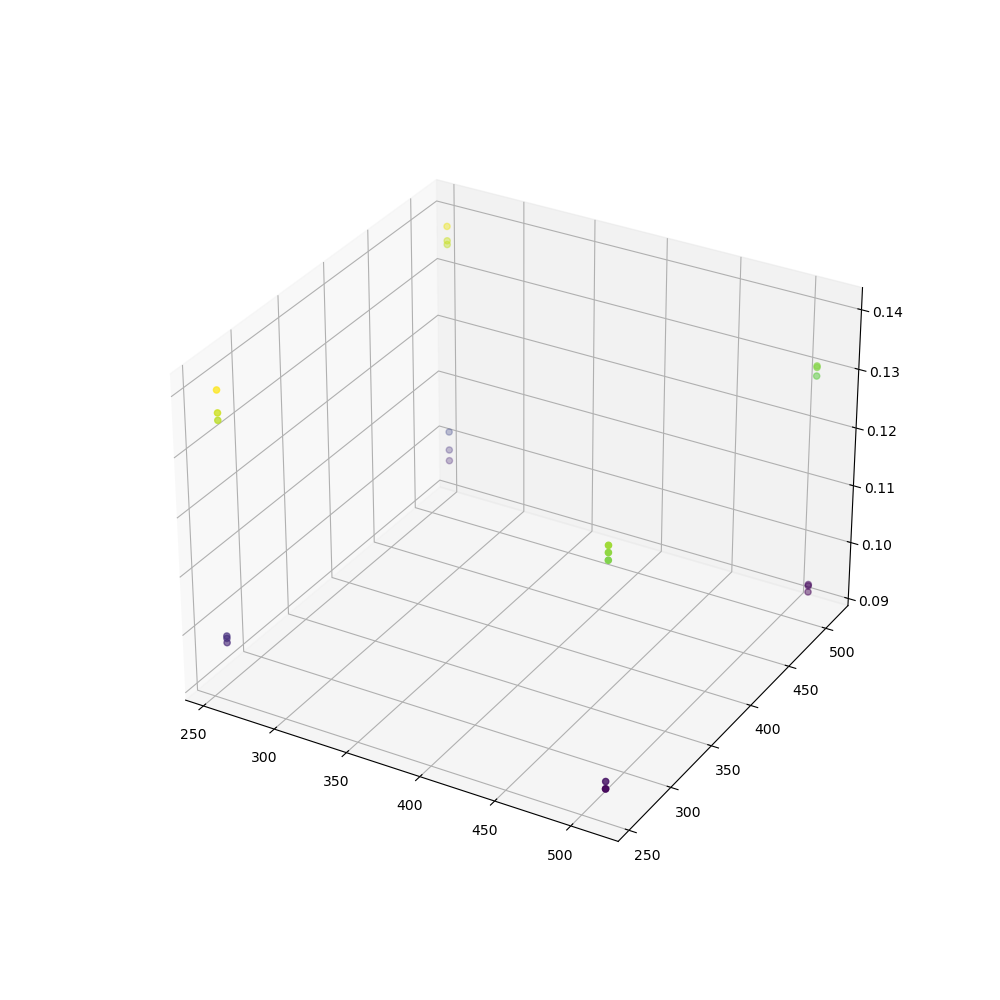

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
x=mp[mp.Amplitude < 0.15].NombreSousEchantillons.tolist()
y=mp[mp.Amplitude < 0.15].TailleSousEchantillons.tolist()
z=mp[mp.Amplitude < 0.15].Amplitude.tolist()
ax.scatter(x, y, z, zdir='z', s=20, c=z, depthshade=True)

## Récupération des paramètres
Pour un des modèles. Parcours le répertoire "CadreExperimental" s'il existe, pour repérer un fichier modèle.
Si le modèle n'est pas trouvé, fait un entrainement avec les métaparamètres.
Retourne les dits parametres.

In [16]:
cadreExperimental=mn.CadreExperimental(nombrePhases=512,\
                    premierePhase=20,\
                    tailleSousEchantillons=512,\
                    nombreSousEchantillons=512).recupere(rondeEffective=49)

Hardware utilisé : cuda:0
Métaparamètres: 512 phases (première 20), 512 sous échantillons de taille 512 (periode 1.0)


### Au choix selon les besoins et les environnements

In [27]:
cadreExperimental.dessine()

In [14]:
cadreExperimental.parametres()

array([ 1.33639252e+00,  1.14045489e+00,  1.84557247e+00,  2.79906893e+00,
        3.93980622e+00,  3.49756145e+00,  4.58889216e-01,  2.93565512e+00,
        1.03051031e+00,  1.72206366e+00,  1.39855480e+00,  3.97399843e-01,
        8.23074996e-01,  9.16082084e-01,  2.58760905e+00,  1.71813273e+00,
        2.56488204e+00,  3.97467494e-01, -2.66187996e-01,  2.47383046e+00,
        1.16348171e+00,  4.01530695e+00,  4.52333355e+00,  1.58986342e+00,
        2.97458720e+00,  3.79827642e+00, -5.41315138e-01,  2.39304137e+00,
        4.94043350e-01,  5.14372301e+00,  3.08809233e+00,  1.78929436e+00,
        3.67938352e+00,  4.11720932e-01,  3.12589264e+00,  1.94127905e+00,
        1.73954129e+00,  1.22670770e+00,  4.62803841e+00,  2.01386189e+00,
       -4.36709486e-02,  4.91336155e+00,  3.68978930e+00,  4.81444693e+00,
        5.98662376e+00,  9.19272304e-01,  4.16940212e+00,  3.50847650e+00,
        3.28648496e+00,  1.83647096e+00,  5.82833338e+00,  3.25723052e+00,
        2.11602616e+00,  

In [15]:
repr(cadreExperimental.parametres())

'array([ 1.33639252e+00,  1.14045489e+00,  1.84557247e+00,  2.79906893e+00,\n        3.93980622e+00,  3.49756145e+00,  4.58889216e-01,  2.93565512e+00,\n        1.03051031e+00,  1.72206366e+00,  1.39855480e+00,  3.97399843e-01,\n        8.23074996e-01,  9.16082084e-01,  2.58760905e+00,  1.71813273e+00,\n        2.56488204e+00,  3.97467494e-01, -2.66187996e-01,  2.47383046e+00,\n        1.16348171e+00,  4.01530695e+00,  4.52333355e+00,  1.58986342e+00,\n        2.97458720e+00,  3.79827642e+00, -5.41315138e-01,  2.39304137e+00,\n        4.94043350e-01,  5.14372301e+00,  3.08809233e+00,  1.78929436e+00,\n        3.67938352e+00,  4.11720932e-01,  3.12589264e+00,  1.94127905e+00,\n        1.73954129e+00,  1.22670770e+00,  4.62803841e+00,  2.01386189e+00,\n       -4.36709486e-02,  4.91336155e+00,  3.68978930e+00,  4.81444693e+00,\n        5.98662376e+00,  9.19272304e-01,  4.16940212e+00,  3.50847650e+00,\n        3.28648496e+00,  1.83647096e+00,  5.82833338e+00,  3.25723052e+00,\n        2.1

### Génération de modèles au hasard

In [7]:
import random
amplitudeTest=2
for i in range(20):
    cadreExperimental = mn.CadreExperimental(
        nombrePhases = random.randint(200, 550),
        tailleSousEchantillons = random.randint(200, 550),
        nombreSousEchantillons = random.randint(200, 550),
        premierePhase = random.randint(10, 20))
    if (amplitudeTest > cadreExperimental.entraine(nombreRondes = random.randint(40, 50), dessine=0, trace=1).amplitudeTest):
        cadreExperimental.sauve(sauveParametres=True)
        amplitudeTest=cadreExperimental.amplitudeTest
    else:
        cadreExperimental.sauve(sauveParametres=False)
amplitudeTest


Hardware utilisé : cuda:0
Métaparamètres: 287 phases (première 19), 362 sous échantillons de taille 442 (periode 1.0)
Nombre prévu de rondes 42, patience: 3, amplitude initiale: 0.269116
Ronde 41, Amplitude(test): 0.126824
Hardware utilisé : cuda:0
Métaparamètres: 458 phases (première 17), 438 sous échantillons de taille 393 (periode 1.0)
Nombre prévu de rondes 43, patience: 3, amplitude initiale: 0.230262
Ronde 43, Amplitude(test): 0.098234
Hardware utilisé : cuda:0
Métaparamètres: 448 phases (première 11), 311 sous échantillons de taille 306 (periode 1.0)
Nombre prévu de rondes 42, patience: 3, amplitude initiale: 0.234420
Ronde 42, Amplitude(test): 0.104541
Hardware utilisé : cuda:0
Métaparamètres: 506 phases (première 14), 438 sous échantillons de taille 464 (periode 1.0)
Nombre prévu de rondes 46, patience: 3, amplitude initiale: 0.224767
Ronde 29, Amplitude(test): 0.097935
Hardware utilisé : cuda:0
Métaparamètres: 434 phases (première 11), 220 sous échantillons de taille 294 (per

tensor(0.0896, device='cuda:0')

## Génération d'une grille de modèles

In [36]:
amplitudeTest=2
for nombrePhases in [256, 512]:
    for premierePhase in [10, 15, 20]:
        for tailleSousEchantillons in [128, 256, 512]:
            for nombreSousEchantillons in [128, 256, 512]:
                for rondes in [25, 50]:
                    cadreExperimental = mn.CadreExperimental(
                        nombrePhases=nombrePhases,\
                        premierePhase=premierePhase,\
                        tailleSousEchantillons=tailleSousEchantillons,\
                        nombreSousEchantillons=nombreSousEchantillons)
                    if (amplitudeTest > cadreExperimental.entraine(nombreRondes = rondes, dessine=0, trace=0).amplitudeTest):
                        cadreExperimental.sauve(sauveParametres=True)
                        amplitudeTest=cadreExperimental.amplitudeTest
                    else:
                        cadreExperimental.sauve(sauveParametres=False)
amplitudeTest

Le système est entrainé sur 128 sous échantillons de taille 128.
Le ratio entre la taille de ces sous échantillons et le nombre de phases est de 0.5.
Hardware utilisé : cuda:0
Le système est entrainé sur 256 sous échantillons de taille 128.
Le ratio entre la taille de ces sous échantillons et le nombre de phases est de 0.5.
Hardware utilisé : cuda:0
Le système est entrainé sur 512 sous échantillons de taille 128.
Le ratio entre la taille de ces sous échantillons et le nombre de phases est de 0.5.
Hardware utilisé : cuda:0
Le système est entrainé sur 128 sous échantillons de taille 256.
Le ratio entre la taille de ces sous échantillons et le nombre de phases est de 1.0.
Hardware utilisé : cuda:0
Le système est entrainé sur 256 sous échantillons de taille 256.
Le ratio entre la taille de ces sous échantillons et le nombre de phases est de 1.0.
Hardware utilisé : cuda:0
Le système est entrainé sur 512 sous échantillons de taille 256.
Le ratio entre la taille de ces sous échantillons et le

In [7]:
import random

amplitudeTest=2
for nombrePhases in [256, 512]:
    for premierePhase in [10, 15, 20]:
        for tailleSousEchantillons in [256, 512]:
            for nombreSousEchantillons in [256, 512]:
                cadreExperimental = mn.CadreExperimental(
                    nombrePhases=nombrePhases,\
                    premierePhase=premierePhase,\
                    tailleSousEchantillons=tailleSousEchantillons,\
                    nombreSousEchantillons=nombreSousEchantillons)
                if (amplitudeTest > cadreExperimental.entraine(nombreRondes = random.randint(40, 50), dessine=0, trace=1).amplitudeTest):
                    cadreExperimental.sauve(sauveParametres=True)
                    amplitudeTest=cadreExperimental.amplitudeTest
                else:
                    cadreExperimental.sauve(sauveParametres=False)
amplitudeTest

Hardware utilisé : cuda:0
Métaparamètres: 256 phases (première 10), 256 sous échantillons de taille 256 (periode 1.0)
Nombre prévu de rondes 48, patience: 3, amplitude initiale: 0.279714
Ronde 48, Amplitude(test): 0.135227
Hardware utilisé : cuda:0
Métaparamètres: 256 phases (première 10), 512 sous échantillons de taille 256 (periode 1.0)
Nombre prévu de rondes 44, patience: 3, amplitude initiale: 0.282763
Ronde 44, Amplitude(test): 0.132253
Hardware utilisé : cuda:0
Métaparamètres: 256 phases (première 10), 256 sous échantillons de taille 512 (periode 1.0)
Nombre prévu de rondes 50, patience: 3, amplitude initiale: 0.339135
Ronde 49, Amplitude(test): 0.135623
Hardware utilisé : cuda:0
Métaparamètres: 256 phases (première 10), 512 sous échantillons de taille 512 (periode 1.0)
Nombre prévu de rondes 46, patience: 3, amplitude initiale: 0.298666
Ronde 46, Amplitude(test): 0.131246
Hardware utilisé : cuda:0
Métaparamètres: 256 phases (première 15), 256 sous échantillons de taille 256 (per

tensor(0.0922, device='cuda:0')

In [ ]:
# Cette cellule Notebook doit être activée seulement dans Google Colab
# Elle permet de monter l'environnement dans ce contexte
# import os
# if not os.path.exists('thinkdsp.py'):
#    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

In [ ]:
# faire "!pip install scipy" dans une cellule si le package n'est pas présent

In [1]:
from thinkdsp import CosSignal, SinSignal

cos_sig = CosSignal(freq=440, amp=1.0, offset=0)
sin_sig = SinSignal(freq=880, amp=0.5, offset=0)

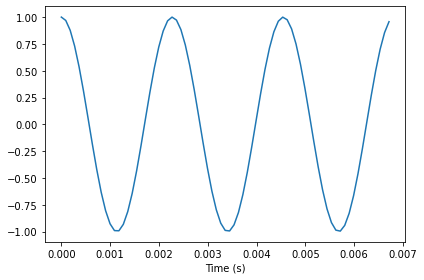

In [2]:
from thinkdsp import decorate

cos_sig.plot()
decorate(xlabel='Time (s)')

In [3]:
mix = sin_sig + cos_sig
wave = mix.make_wave(duration=0.5, start=0, framerate=11025)
wave

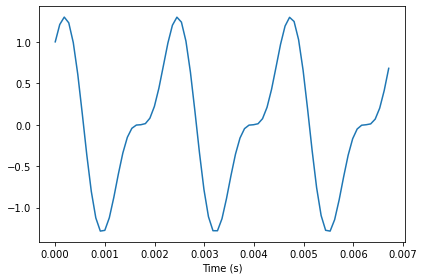

In [4]:
mix.plot()
decorate(xlabel='Time (s)')

In [5]:
wave = mix.make_wave(duration=0.5, start=0, framerate=11025)
wave

In [6]:
wave.ys

array([1.        , 1.209102  , 1.29840734, ..., 0.14744616, 0.33476757,
       0.58844095])

In [7]:
from IPython.display import Audio
audio = Audio(data=wave.ys, rate=wave.framerate)
audio

In [8]:
wave.make_audio()